# Heart Diseases Diagnisis

### Prequisites

In [56]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import graphviz
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score

## Get Data 

In [2]:
columns = ['age','sex', 'cp', 'bps', 'chol', 'fbs', 'ecg', 'hrate', 'ang', 'peak', 'slp', 'ca', 'thal', 'diag']

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [4]:
data = pd.read_csv(url, names=columns, na_values=['?'])

In [5]:
data.head()

,age,sex,cp,bps,chol,fbs,ecg,hrate,ang,peak,slp,ca,thal,diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     303 non-null    float64
 1   sex     303 non-null    float64
 2   cp      303 non-null    float64
 3   bps     303 non-null    float64
 4   chol    303 non-null    float64
 5   fbs     303 non-null    float64
 6   ecg     303 non-null    float64
 7   hrate   303 non-null    float64
 8   ang     303 non-null    float64
 9   peak    303 non-null    float64
 10  slp     303 non-null    float64
 11  ca      299 non-null    float64
 12  thal    301 non-null    float64
 13  diag    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [7]:
data.shape

(303, 14)

In [8]:
data.isnull().sum()

age      0
sex      0
cp       0
bps      0
chol     0
fbs      0
ecg      0
hrate    0
ang      0
peak     0
slp      0
ca       4
thal     2
diag     0
dtype: int64

In [9]:
data.describe()

,age,sex,cp,bps,chol,fbs,ecg,hrate,ang,peak,slp,ca,thal,diag
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
data.groupby(['diag']).size()

diag
0    164
1     55
2     36
3     35
4     13
dtype: int64

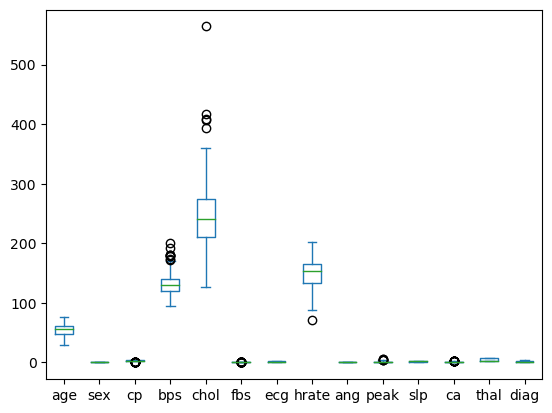

In [11]:
data.plot(kind = 'box')
plt.show()

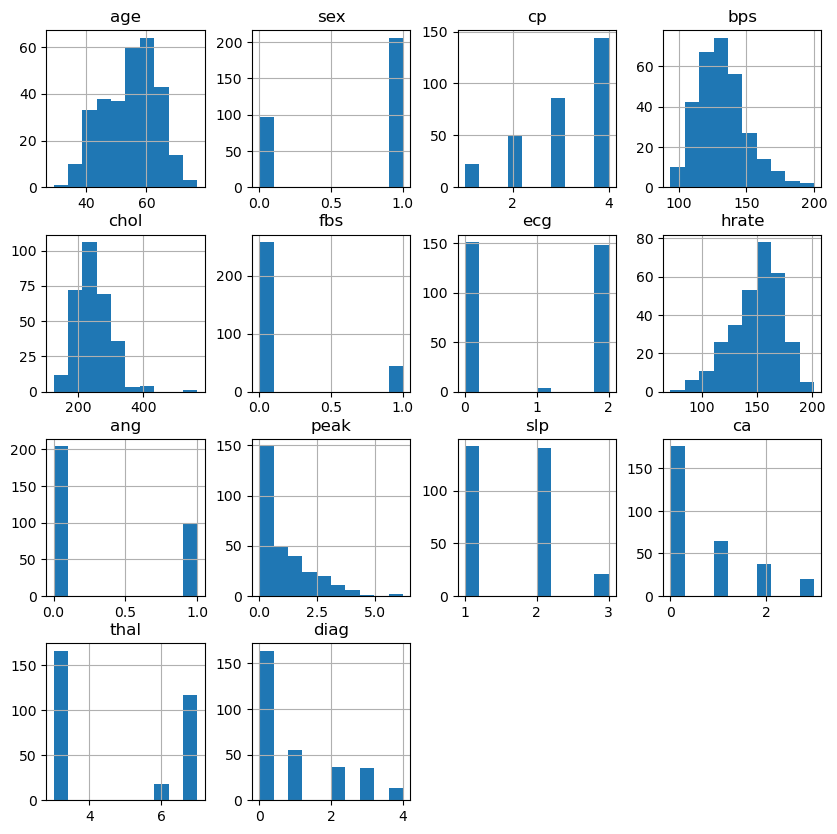

In [12]:
data.hist(figsize=(10,10))
plt.show()

## Machine Learning

## Data Split

In [13]:
data = data.dropna()

In [14]:
array = data.values
array

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [68.,  1.,  4., ...,  2.,  7.,  2.],
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.]])

In [16]:
X, y = array[:,:-1], array[:, -1]

In [18]:
y

array([0., 2., 1., 0., 0., 0., 3., 0., 2., 1., 0., 0., 2., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 3., 4., 0., 0., 0., 0., 3., 0., 2., 1., 0.,
       0., 0., 3., 1., 3., 0., 4., 0., 0., 0., 1., 4., 0., 4., 0., 0., 0.,
       0., 2., 0., 1., 1., 1., 1., 0., 0., 2., 0., 1., 0., 2., 2., 1., 0.,
       2., 1., 0., 3., 1., 1., 1., 0., 1., 0., 0., 3., 0., 0., 0., 3., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 0., 1., 2., 3., 0., 0., 0., 0., 0.,
       0., 3., 0., 2., 1., 2., 3., 1., 1., 0., 2., 2., 0., 0., 0., 3., 2.,
       3., 4., 0., 3., 1., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
       3., 1., 0., 0., 1., 0., 1., 0., 1., 4., 0., 0., 0., 0., 0., 0., 4.,
       3., 1., 1., 1., 2., 0., 0., 4., 0., 0., 0., 0., 0., 1., 0., 3., 0.,
       1., 0., 4., 1., 0., 1., 0., 0., 3., 2., 0., 0., 1., 0., 0., 2., 1.,
       2., 0., 3., 2., 0., 3., 0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 3.,
       3., 0., 1., 0., 4., 0., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 3.,
       1., 0., 0., 0., 3.

In [19]:
X

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

In [75]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=123, test_size=0.2)

In [76]:
X_test

array([[5.30e+01, 0.00e+00, 4.00e+00, 1.30e+02, 2.64e+02, 0.00e+00,
        2.00e+00, 1.43e+02, 0.00e+00, 4.00e-01, 2.00e+00, 0.00e+00,
        3.00e+00],
       [5.60e+01, 0.00e+00, 4.00e+00, 2.00e+02, 2.88e+02, 1.00e+00,
        2.00e+00, 1.33e+02, 1.00e+00, 4.00e+00, 3.00e+00, 2.00e+00,
        7.00e+00],
       [5.90e+01, 1.00e+00, 4.00e+00, 1.40e+02, 1.77e+02, 0.00e+00,
        0.00e+00, 1.62e+02, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        7.00e+00],
       [5.80e+01, 0.00e+00, 4.00e+00, 1.30e+02, 1.97e+02, 0.00e+00,
        0.00e+00, 1.31e+02, 0.00e+00, 6.00e-01, 2.00e+00, 0.00e+00,
        3.00e+00],
       [4.00e+01, 1.00e+00, 4.00e+00, 1.52e+02, 2.23e+02, 0.00e+00,
        0.00e+00, 1.81e+02, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        7.00e+00],
       [4.60e+01, 1.00e+00, 4.00e+00, 1.20e+02, 2.49e+02, 0.00e+00,
        2.00e+00, 1.44e+02, 0.00e+00, 8.00e-01, 1.00e+00, 0.00e+00,
        7.00e+00],
       [6.90e+01, 0.00e+00, 1.00e+00, 1.40e+02, 2.39e+02, 0.00e+00,
  

In [77]:
print(y_test)

[0. 3. 2. 0. 1. 1. 0. 0. 0. 0. 0. 2. 2. 0. 3. 3. 1. 0. 0. 0. 0. 3. 0. 1.
 3. 3. 0. 0. 1. 3. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 2. 0. 2. 0.
 0. 2. 0. 2. 1. 0. 3. 2. 4. 1. 0. 0.]


## Train the M0DEL

In [78]:
param = {'max_depth': 5}

In [79]:
classifier = DecisionTreeClassifier(**param)

In [80]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [81]:
#visualize_classifier(classifier, X_train, y_train, 'Training')

In [82]:
dot_data = tree.export_graphviz(classifier,
                                out_file=None, 
                                feature_names=data.columns[:13], 
                                class_names = True, 
                                filled = True, 
                                rounded=True, 
                                proportion=False, 
                                special_characters=True)
graph = graphviz.Source(dot_data)

In [83]:
y_predict=classifier.predict(X_test)

In [84]:
y_predict

array([0., 2., 2., 0., 0., 3., 0., 0., 0., 0., 0., 2., 1., 0., 3., 2., 1.,
       0., 0., 0., 0., 4., 0., 0., 1., 2., 1., 0., 2., 2., 1., 4., 0., 2.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 3., 0., 2., 0., 0., 2., 0.,
       1., 0., 0., 4., 3., 2., 3., 0., 0.])

In [85]:
accuracy_score(y_test, y_predict)

0.5666666666666667

In [86]:
mat = confusion_matrix(y_test, y_predict)
mat

array([[28,  3,  1,  0,  1],
       [ 5,  1,  2,  2,  0],
       [ 0,  2,  4,  2,  0],
       [ 0,  1,  4,  1,  2],
       [ 0,  0,  1,  0,  0]])

In [88]:
conf = pd.crosstab(y_test, y_predict)
conf

col_0,0.0,1.0,2.0,3.0,4.0
row_0,,,,,
0.0,28,3,1,0,1
1.0,5,1,2,2,0
2.0,0,2,4,2,0
3.0,0,1,4,1,2
4.0,0,0,1,0,0
